In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
print("Libraries imported Successfully")

Libraries imported Successfully


In [2]:
#Loading the dataset
df=pd.read_csv(r"/content/drive/MyDrive/Machine Learning/Wholesale customers data.csv")
print("Dataset loaded Successfully")
df.head()

Dataset loaded Successfully


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [6]:
#check for missing values
missing_values=df.isnull().sum()
print("Missing values in the the dataset:")
print(missing_values)

Missing values in the the dataset:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


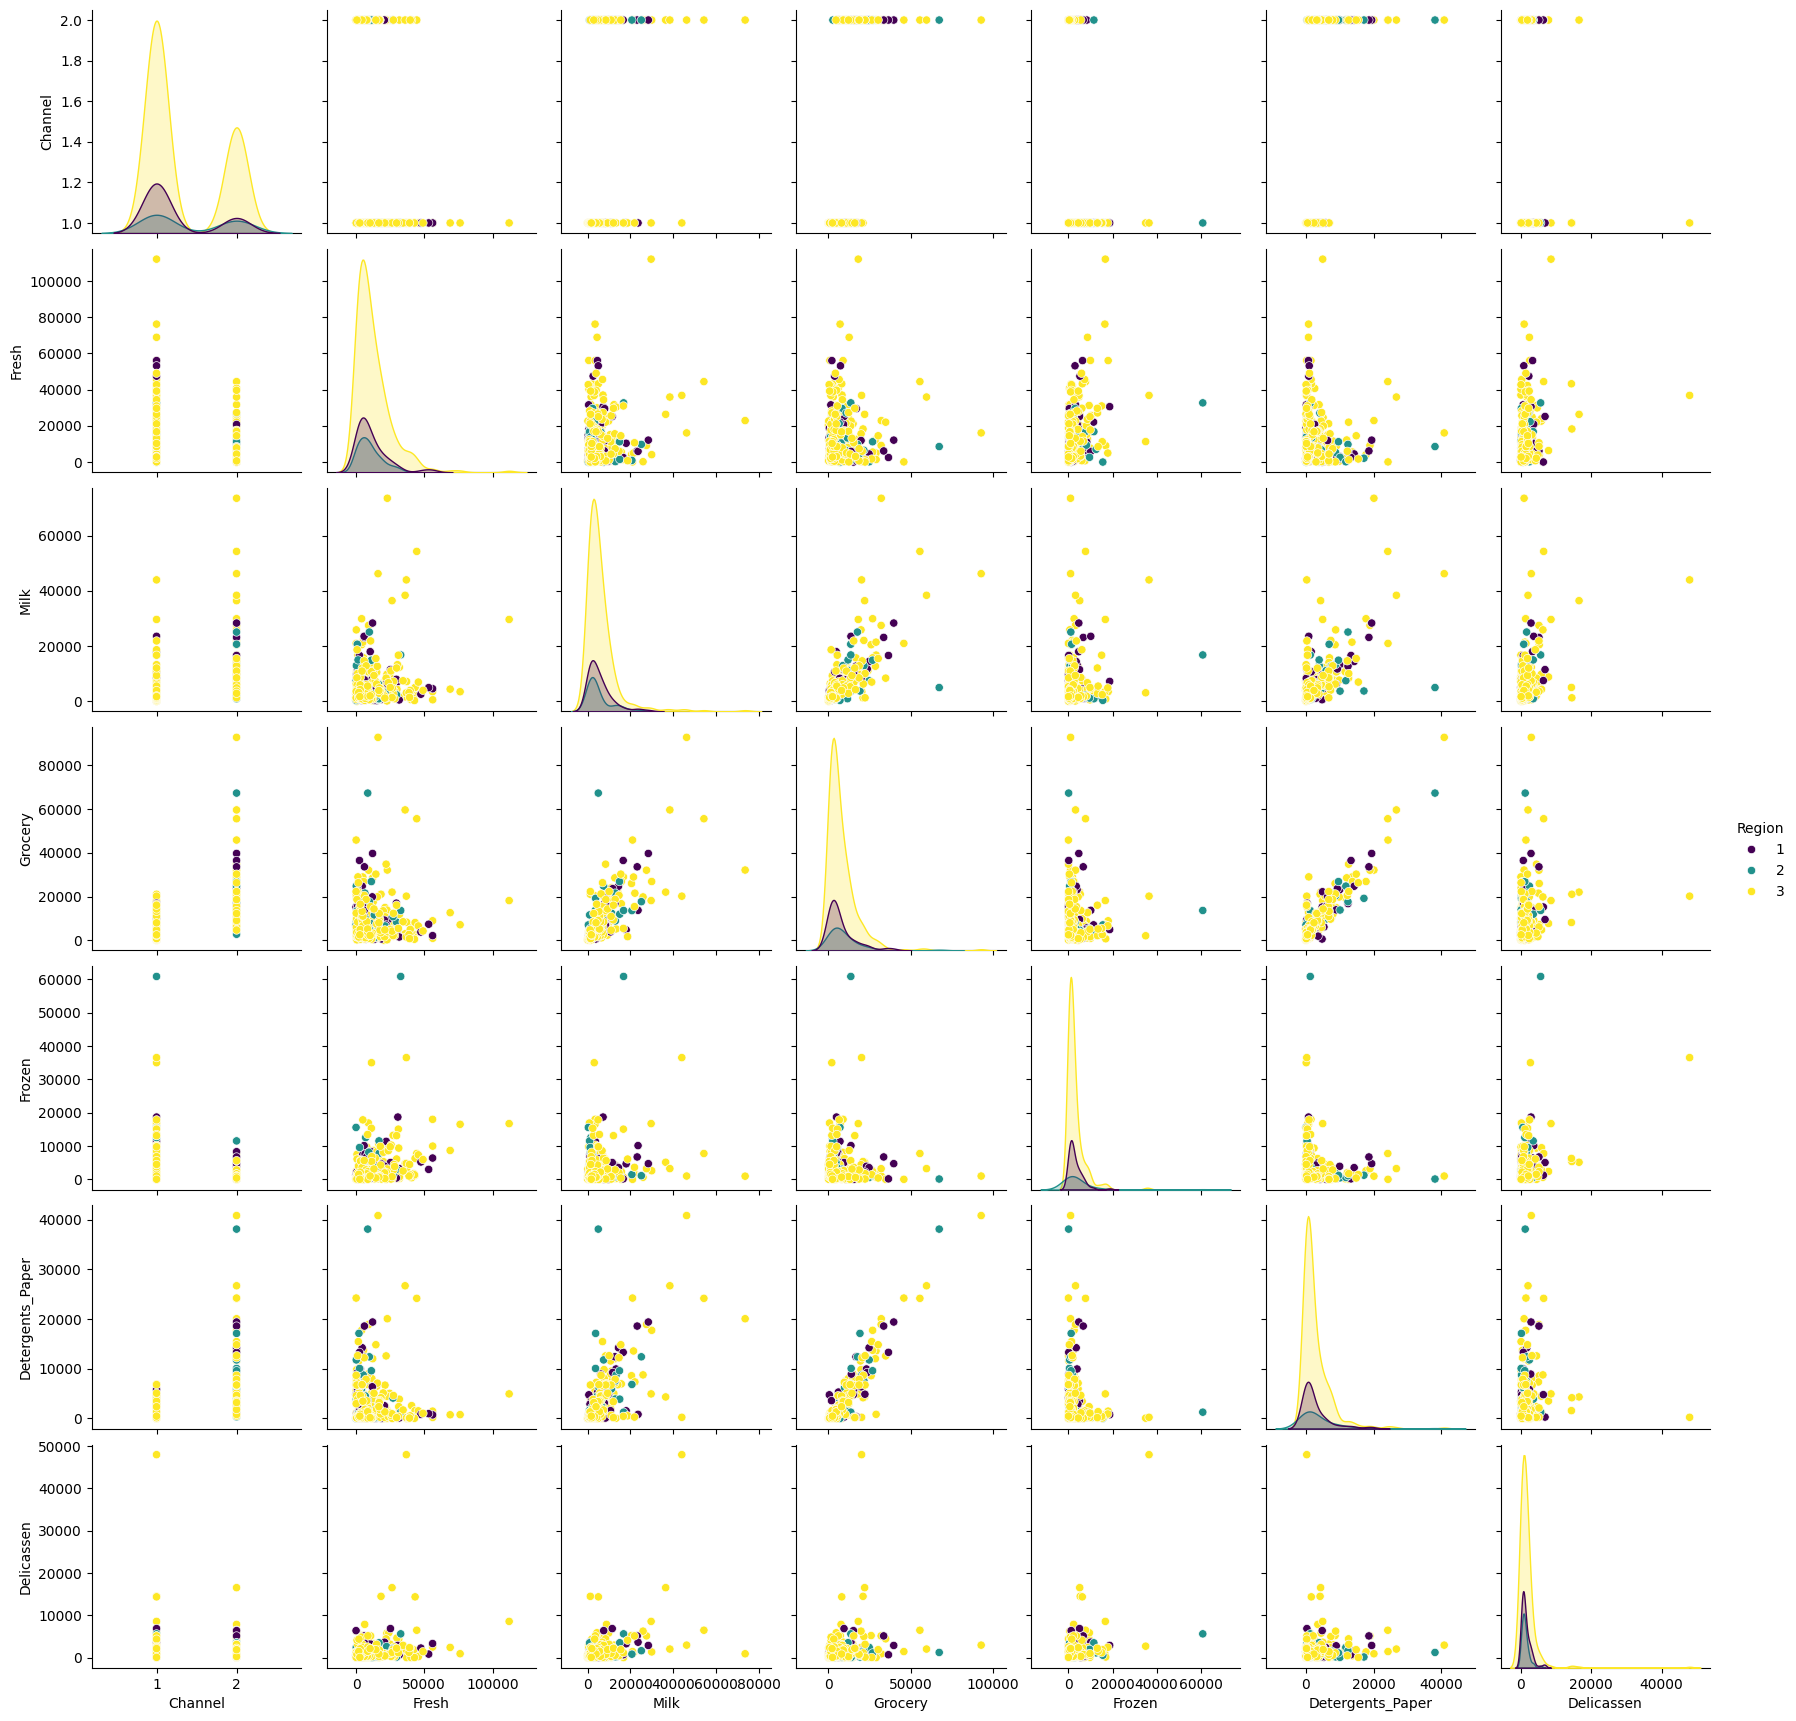

In [7]:
#visualization
#1. Pair Plot
sns.pairplot(df, hue="Region", palette="viridis")
plt.show()

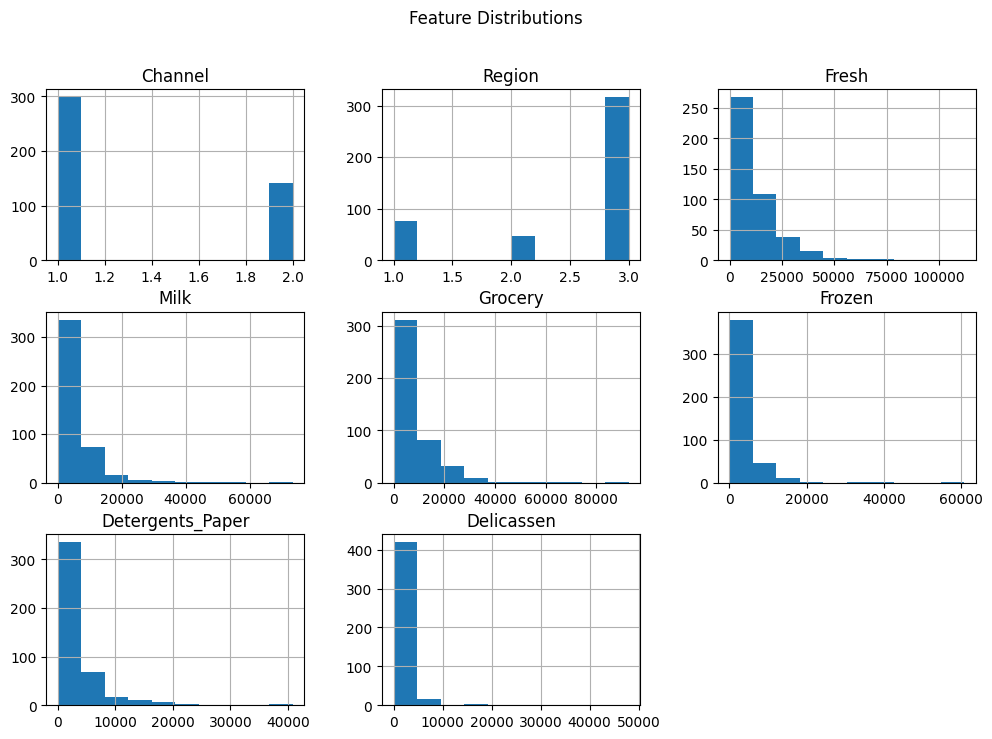

In [8]:
#2. Histogram
df.hist(figsize=(12, 8), bins=10)
plt.suptitle("Feature Distributions")
plt.show()

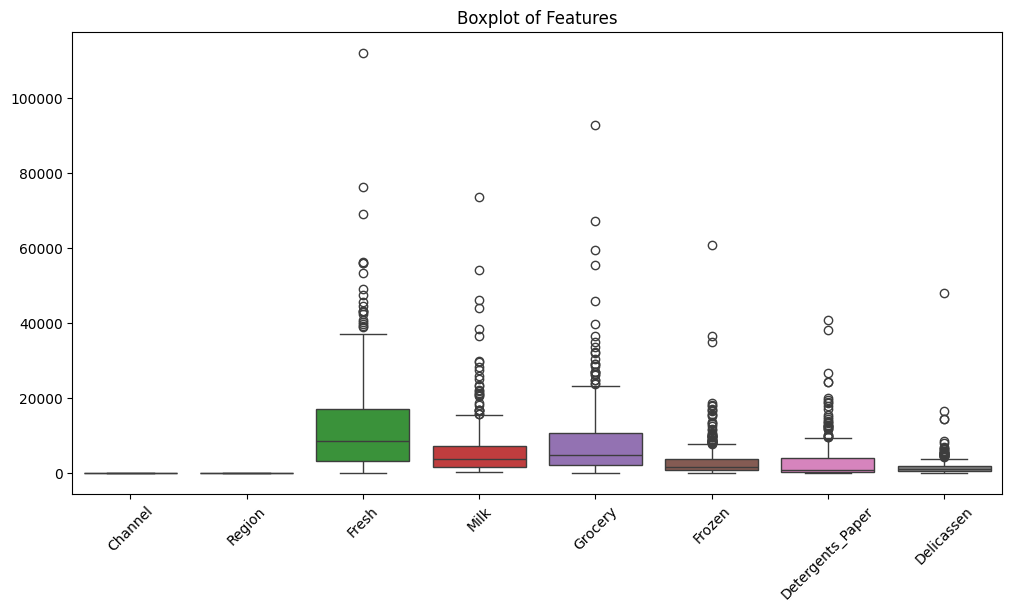

In [9]:
#3. Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()

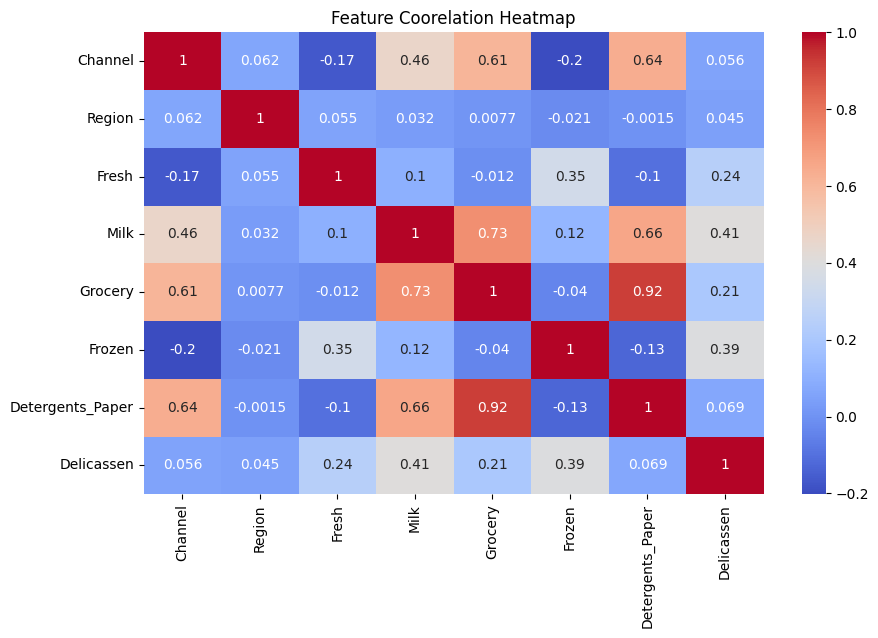

In [10]:
#4. Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Coorelation Heatmap")
plt.show()

In [11]:
#selec features for clustring
features=df[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicassen']]

#scale the features
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

#print Statement
print("Features selected and scaled for clustring")
print(scaled_features[:5])

Features selected and scaled for clustring
[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 [ 0.10011141 -0.62401993 -0.3929769   0.6871443  -0.49858822  0.09341105]
 [ 0.84023948 -0.05239645 -0.07935618  0.17385884 -0.23191782  1.29934689]]


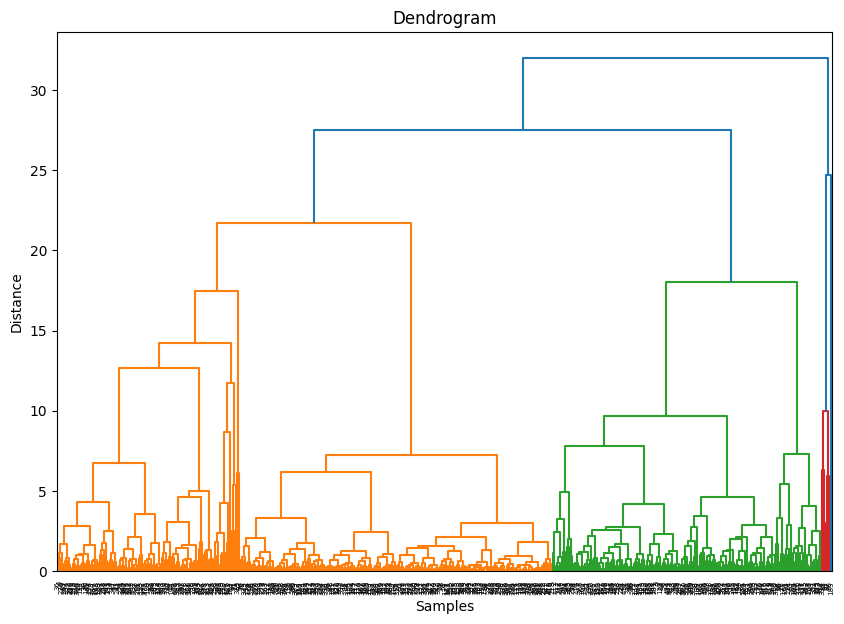

Dendrogram plotted to determine the optional number of clusters.


In [12]:
#determine the optimal number of clusters using a dendrogram
#cretae the linkage matrix
linked=linkage(scaled_features,method='ward')
#plot the dendogram
plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
print("Dendrogram plotted to determine the optional number of clusters.")

In [13]:
#apply agglomerative clustering with the optimal no of clusters
agg_clustering=AgglomerativeClustering(n_clusters=3)
clusters=agg_clustering.fit_predict(scaled_features)

#add the cluster labels to the original dataframe
df['cluster']=clusters
print("Agglomerative Clustering applied and cluster labels added to the dataset.")
df.head()



Agglomerative Clustering applied and cluster labels added to the dataset.


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1


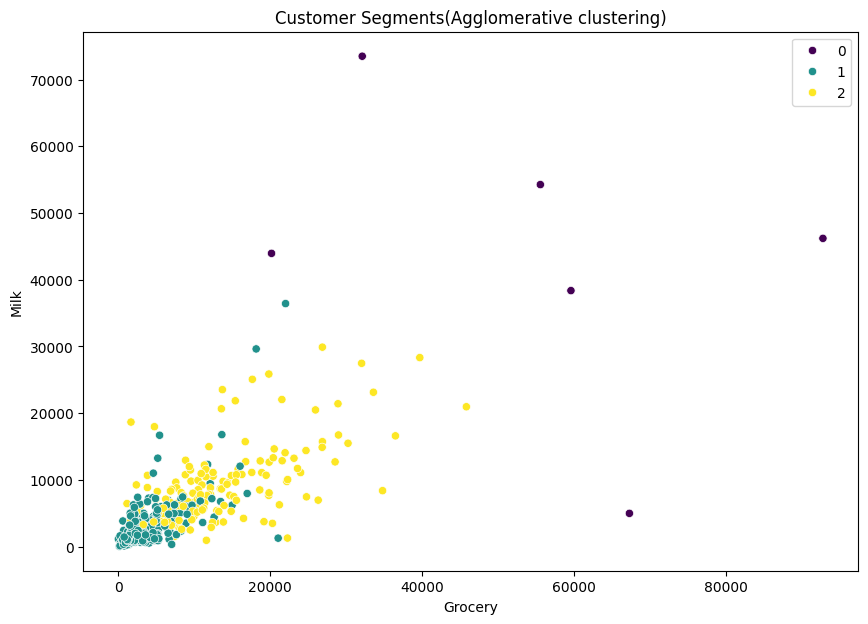

Clusters Visualized


In [14]:
#visualize
plt.figure(figsize=(10,7))
sns.scatterplot(x='Grocery',y='Milk',hue='cluster',palette='viridis',data=df)
plt.title('Customer Segments(Agglomerative clustering)')
plt.legend()
plt.show()
print("Clusters Visualized")

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X=df.drop('cluster',axis=1)
y=df['cluster']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)
y_pred_knn=knn_clf.predict(X_test)
accuracy_knn=accuracy_score(y_test,y_pred_knn)
conf_matrix_knn=confusion_matrix(y_test,y_pred_knn)
class_report_knn=classification_report(y_test,y_pred_knn)
print(f'k-NN Accuracy:{accuracy_knn:.2f}')
print('Confusion Matrix:')
print(conf_matrix_knn)
print('Classification Report:')
print(class_report_knn)

k-NN Accuracy:0.94
Confusion Matrix:
[[57  0]
 [ 5 26]]
Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        57
           2       1.00      0.84      0.91        31

    accuracy                           0.94        88
   macro avg       0.96      0.92      0.94        88
weighted avg       0.95      0.94      0.94        88



In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(X_train,y_train)
y_pred_kmeans=kmeans.predict(X_test)
accuracy_kmeans=accuracy_score(y_test,y_pred_knn)
conf_matrix_kmeans=confusion_matrix(y_test,y_pred_kmeans)
class_report_kmeans=classification_report(y_test,y_pred_kmeans)
print(f'k-means accuracy:{accuracy_kmeans:.2f}')
print('Confusion matrix:')
print(conf_matrix_kmeans)
print("classification report:")
print(class_report_kmeans)

k-means accuracy:0.94
Confusion matrix:
[[ 0  0  0  0  0  0]
 [ 2  8  0  1 11 35]
 [16  1  5  0  0  9]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]
classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.89      0.14      0.24        57
           2       1.00      0.16      0.28        31
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.15        88
   macro avg       0.31      0.05      0.09        88
weighted avg       0.93      0.15      0.25        88



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred_tree=tree_clf.predict(X_test)
accuracy_tree=accuracy_score(y_test,y_pred_tree)
conf_matrix_tree=confusion_matrix(y_test,y_pred_tree)
class_report_tree=classification_report(y_test,y_pred_tree)
print(f'Decision Tree Accuracy:{accuracy_tree:.2f}')
print('Confusion matrix:')
print(conf_matrix_tree)
print('Classification Report:')
print(class_report_tree)

Decision Tree Accuracy:0.91
Confusion matrix:
[[57  0]
 [ 8 23]]
Classification Report:
              precision    recall  f1-score   support

           1       0.88      1.00      0.93        57
           2       1.00      0.74      0.85        31

    accuracy                           0.91        88
   macro avg       0.94      0.87      0.89        88
weighted avg       0.92      0.91      0.91        88



In [24]:
import pickle
from sklearn.ensemble import RandomForestClassifier
random_clf=RandomForestClassifier(n_estimators=100)
random_clf.fit(X_test,y_test)
y_pred_random=random_clf.predict(X_test)
accuracy_random=accuracy_score(y_test,y_pred_random)
conf_matrix_random=confusion_matrix(y_test,y_pred_random)
class_report_random=classification_report(y_test,y_pred_random)
print(f'Random Forest Accuracy:{accuracy_random:.2f}')
print('Confusion matrix:')
print(conf_matrix_random)
print('Classification Report:')
print(class_report_random)

with open("random_forest_model.pkl", "wb") as model_file:
    pickle.dump(random_clf, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

Random Forest Accuracy:1.00
Confusion matrix:
[[57  0]
 [ 0 31]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        31

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



In [25]:
from sklearn.linear_model import SGDClassifier
# Change '12' to 'l2' for the penalty parameter
classify = SGDClassifier(loss='hinge', penalty='l2', max_iter=5)
classify.fit(X_test, y_test)
y_pred_classify = classify.predict(X_test)
accuracy_classify = accuracy_score(y_test, y_pred_classify)
conf_matrix_classify = confusion_matrix(y_test, y_pred_classify)
class_report_classify = classification_report(y_test, y_pred_classify)
print(f'SGD:{accuracy_classify:.2f}')
print('Confusion matrix:')
print(conf_matrix_classify)
print('classification_report')
print(class_report_classify)

SGD:0.95
Confusion matrix:
[[56  1]
 [ 3 28]]
classification_report
              precision    recall  f1-score   support

           1       0.95      0.98      0.97        57
           2       0.97      0.90      0.93        31

    accuracy                           0.95        88
   macro avg       0.96      0.94      0.95        88
weighted avg       0.95      0.95      0.95        88



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [33]:
import pickle
import numpy as np

def infer_wholesale_cluster(model_path, scaler_path, input_features):
    """
    Perform inferencing on the wholesale customer dataset using a classification model.

    Parameters:
    - model_path (str): Path to the saved classification model pickle file.
    - scaler_path (str): Path to the saved scaler pickle file.
    - input_features (list): List of input features (same order as used for training):
      [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]

    Returns:
    - int: Predicted cluster category.
    """
    try:
        # Load the trained classification model
        with open(r'/content/random_forest_model.pkl', 'rb') as model_file:
            model = pickle.load(model_file)

        # Load the scaler
        with open(r'/content/scaler.pkl', 'rb') as scaler_file:
            scaler = pickle.load(scaler_file)

        # Ensure the input features are in the correct format
        input_array = np.array([input_features]).reshape(1, -1)

        # Scale the input features
        scaled_input = scaler.transform(input_array)

        # Predict the cluster category
        prediction = model.predict(scaled_input)[0]

        return f"Predicted Cluster: {prediction}"

    except Exception as e:
        return f"An error occurred: {e}"

# Example input: Replace with actual feature values
input_features = [2, 3, 12669, 9656, 7561, 214, 2674, 1338]

# Paths to your saved model and scaler
model_path = '/content/random_forest_model.pkl'
scaler_path = '/content/scaler.pkl'

# Perform inference
result = infer_wholesale_cluster(model_path, scaler_path, input_features)
print(result)




Predicted Cluster: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
